#### Importing libraries

In [1]:
import missingno as mn
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import pickle
from warnings import filterwarnings
filterwarnings('ignore')

#### Data preprocessing

In [2]:
df = pd.read_csv('diabetes_data_upload.csv')
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


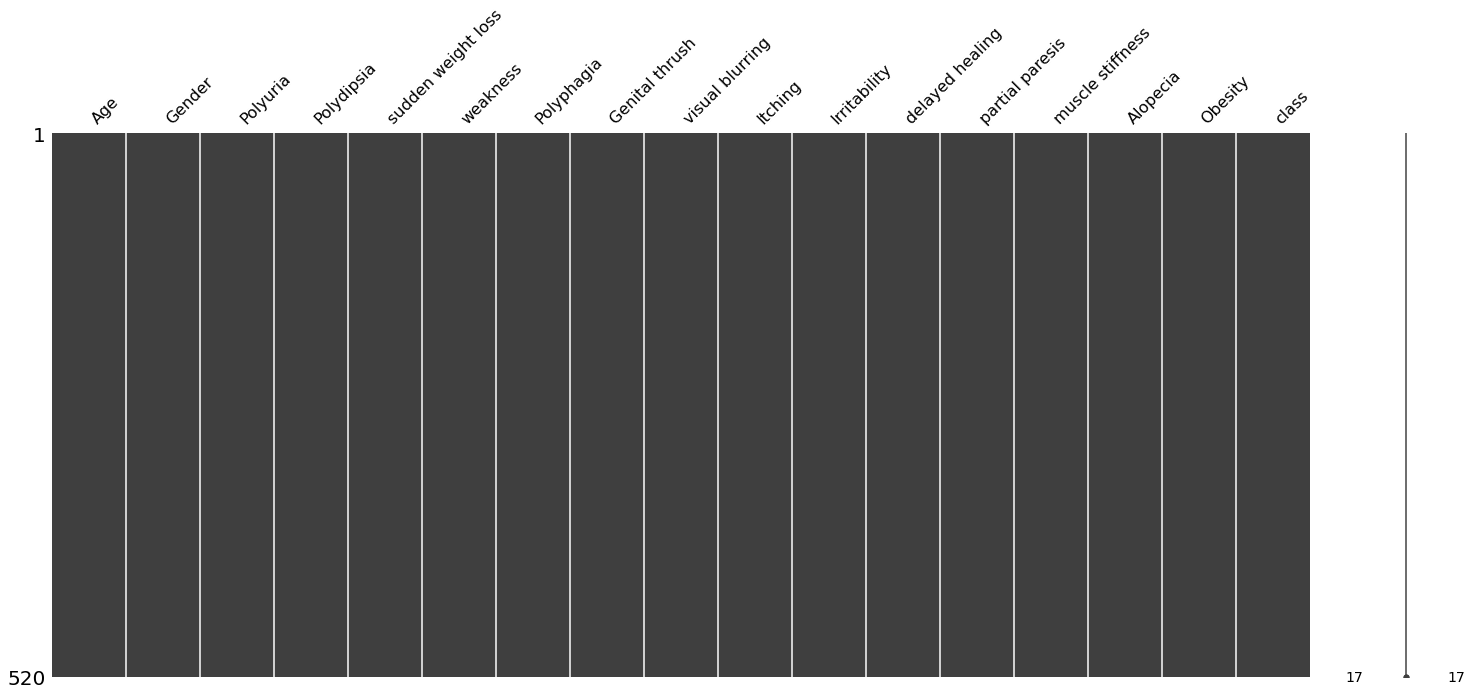

In [3]:
mn.matrix(df);

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0


In [5]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [6]:
# convert object types to categorical
df.iloc[:,1:17] = df.iloc[:,1:17].apply(lambda x:pd.Categorical(x) )

In [7]:
df.dtypes

Age                      int64
Gender                category
Polyuria              category
Polydipsia            category
sudden weight loss    category
weakness              category
Polyphagia            category
Genital thrush        category
visual blurring       category
Itching               category
Irritability          category
delayed healing       category
partial paresis       category
muscle stiffness      category
Alopecia              category
Obesity               category
class                 category
dtype: object

In [8]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [9]:
df = pd.get_dummies(df)

In [10]:
df

,Age,Gender_Female,Gender_Male,Polyuria_No,Polyuria_Yes,Polydipsia_No,Polydipsia_Yes,sudden weight loss_No,sudden weight loss_Yes,weakness_No,...,partial paresis_No,partial paresis_Yes,muscle stiffness_No,muscle stiffness_Yes,Alopecia_No,Alopecia_Yes,Obesity_No,Obesity_Yes,class_Negative,class_Positive
0,40,0,1,1,0,0,1,1,0,0,...,1,0,0,1,0,1,0,1,0,1
1,58,0,1,1,0,1,0,1,0,0,...,0,1,1,0,0,1,1,0,0,1
2,41,0,1,0,1,1,0,1,0,0,...,1,0,0,1,0,1,1,0,0,1
3,45,0,1,1,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,0,1
4,60,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,0,0,1,0,1,0,1,1,...,0,1,1,0,1,0,1,0,0,1
516,48,1,0,0,1,0,1,0,1,0,...,0,1,1,0,1,0,1,0,0,1
517,58,1,0,0,1,0,1,0,1,0,...,0,1,0,1,1,0,0,1,0,1
518,32,1,0,1,0,1,0,1,0,0,...,1,0,1,0,0,1,1,0,1,0


In [11]:
df = df.drop(['Gender_Male','Polyuria_Yes','Polydipsia_Yes',
              'sudden weight loss_Yes','weakness_No','Polyphagia_No',
              'Genital thrush_No','visual blurring_No','Itching_Yes',
              'Irritability_No','delayed healing_No','partial paresis_No',
              'muscle stiffness_No','Alopecia_No','Obesity_No','class_Negative'],axis=1)

In [12]:
df.columns = ['Age','Gender_Female', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'outcome']

In [13]:
df

,Age,Gender_Female,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,outcome
0,40,0,1,0,1,1,0,0,0,0,0,1,0,1,1,1,1
1,58,0,1,1,1,1,0,0,1,1,0,0,1,0,1,0,1
2,41,0,0,1,1,1,1,0,0,0,0,1,0,1,1,0,1
3,45,0,1,1,0,1,1,1,0,0,0,1,0,0,0,0,1
4,60,0,0,0,0,1,1,0,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1
516,48,1,0,0,0,1,1,0,0,0,1,1,1,0,0,0,1
517,58,1,0,0,0,1,1,0,1,1,0,0,1,1,0,1,1
518,32,1,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0


In [14]:
df['outcome'].value_counts()

1    320
0    200
Name: outcome, dtype: int64

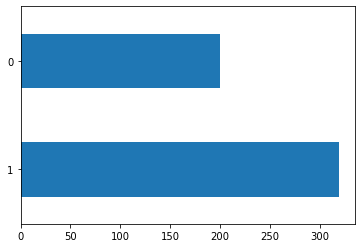

In [15]:
df['outcome'].value_counts().plot.barh();

#### Train-test split

In [16]:
y = df['outcome']
X = df.drop(['outcome'],axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

#### Logistic Regression

In [18]:
log = LogisticRegression(max_iter = 10000,solver='liblinear')
log_model = log.fit(X_train,y_train)
y_pred_log = log_model.predict(X_test)
print('f1_score: ',f1_score(y_test,log_model.predict(X_test),average=None))
print('Acc score:',accuracy_score(y_test,y_pred_log))

f1_score:  [0.91743119 0.95566502]
Acc score: 0.9423076923076923


              precision    recall  f1-score   support

           0       0.91      0.93      0.92        54
           1       0.96      0.95      0.96       102

    accuracy                           0.94       156
   macro avg       0.93      0.94      0.94       156
weighted avg       0.94      0.94      0.94       156



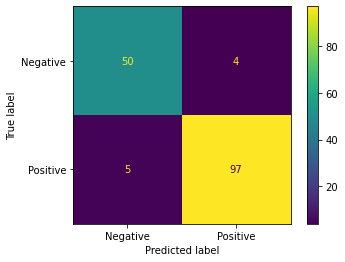

In [19]:
print(classification_report(y_test, y_pred_log))
cm = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cm,display_labels=['Negative','Positive']).plot();

In [20]:
cross_val_score(log_model, X_test, y_test, cv = 10).mean()

0.8916666666666668

#### Naive Bayes

In [21]:
nb = GaussianNB()
nb_model = nb.fit(X_train,y_train)
y_pred_nb = nb_model.predict(X_test)
print('f1_score: ',f1_score(y_test,nb_model.predict(X_test),average=None))
print('Acc score:',accuracy_score(y_test,y_pred_nb))

f1_score:  [0.87037037 0.93137255]
Acc score: 0.9102564102564102


              precision    recall  f1-score   support

           0       0.87      0.87      0.87        54
           1       0.93      0.93      0.93       102

    accuracy                           0.91       156
   macro avg       0.90      0.90      0.90       156
weighted avg       0.91      0.91      0.91       156



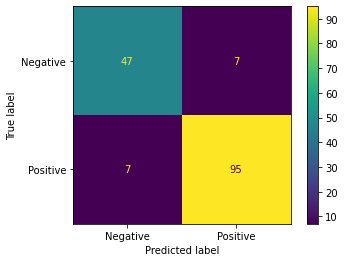

In [22]:
print(classification_report(y_test, y_pred_nb))
cm = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(cm,display_labels=['Negative','Positive']).plot();

In [23]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.8920833333333335

#### K-nearest neigbors

In [24]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train,y_train)
y_pred_knn = knn_model.predict(X_test)
print('f1_score: ',f1_score(y_test,knn_model.predict(X_test),average=None))
print('Acc score:',accuracy_score(y_test,y_pred_knn))

f1_score:  [0.796875   0.85869565]
Acc score: 0.8333333333333334


              precision    recall  f1-score   support

           0       0.69      0.94      0.80        54
           1       0.96      0.77      0.86       102

    accuracy                           0.83       156
   macro avg       0.83      0.86      0.83       156
weighted avg       0.87      0.83      0.84       156



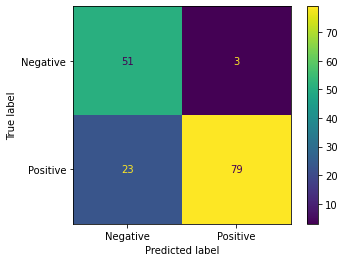

In [25]:
print(classification_report(y_test, y_pred_knn))
cm = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm,display_labels=['Negative','Positive']).plot();

In [26]:
knn_params = {'n_neighbors':np.arange(1,50)}

In [27]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,knn_params,cv=10)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [28]:
knn_cv.best_params_

{'n_neighbors': 1}

In [29]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn_model = knn.fit(X_train,y_train)
y_pred_knn = knn_model.predict(X_test)
print('f1_score: ',f1_score(y_test,knn_model.predict(X_test),average=None))
print('Acc score:',accuracy_score(y_test,y_pred_knn))

f1_score:  [0.89655172 0.93877551]
Acc score: 0.9230769230769231


              precision    recall  f1-score   support

           0       0.84      0.96      0.90        54
           1       0.98      0.90      0.94       102

    accuracy                           0.92       156
   macro avg       0.91      0.93      0.92       156
weighted avg       0.93      0.92      0.92       156



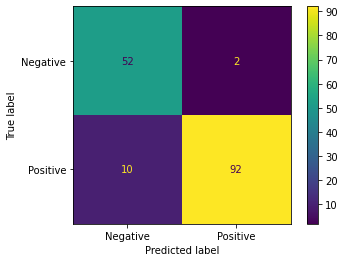

In [30]:
print(classification_report(y_test, y_pred_knn))
cm = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm,display_labels=['Negative','Positive']).plot();

#### Support Vector Machines

##### with linear kernel

In [31]:
svc = SVC(kernel='linear')
svc_model_l = svc.fit(X_train,y_train)
y_pred_svc_l = svc_model_l.predict(X_test)
print('f1_score: ',f1_score(y_test,svc_model_l.predict(X_test),average=None))
print('Acc score:',accuracy_score(y_test,y_pred_svc_l))

f1_score:  [0.90740741 0.95098039]
Acc score: 0.9358974358974359


              precision    recall  f1-score   support

           0       0.91      0.91      0.91        54
           1       0.95      0.95      0.95       102

    accuracy                           0.94       156
   macro avg       0.93      0.93      0.93       156
weighted avg       0.94      0.94      0.94       156



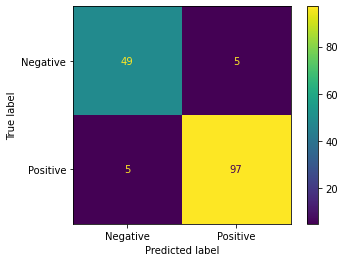

In [32]:
print(classification_report(y_test, y_pred_svc_l))
cm = confusion_matrix(y_test, y_pred_svc_l)
ConfusionMatrixDisplay(cm,display_labels=['Negative','Positive']).plot();

In [33]:
svc_params = {'C':np.arange(1,10)}
svc = SVC(kernel='linear')
svc_cv_l = GridSearchCV(svc,svc_params,cv=10)
svc_cv_l.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [34]:
svc_cv_l.best_params_

{'C': 1}

In [35]:
svc = SVC(kernel='linear',C = 8)
svc_model_l = svc.fit(X_train,y_train)
y_pred_svc_l = svc_model_l.predict(X_test)
print('f1_score: ',f1_score(y_test,svc_model_l.predict(X_test),average=None))
print('Acc score:',accuracy_score(y_test,y_pred_svc_l))

f1_score:  [0.93577982 0.96551724]
Acc score: 0.9551282051282052


              precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.97      0.96      0.97       102

    accuracy                           0.96       156
   macro avg       0.95      0.95      0.95       156
weighted avg       0.96      0.96      0.96       156



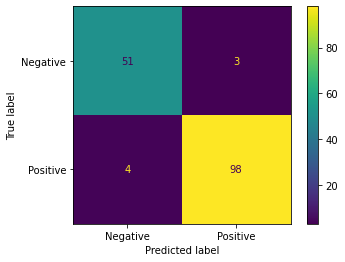

In [36]:
print(classification_report(y_test, y_pred_svc_l))
cm = confusion_matrix(y_test, y_pred_svc_l)
ConfusionMatrixDisplay(cm,display_labels=['Negative','Positive']).plot();

##### with rbf kernel

In [37]:
svc = SVC(kernel='rbf')  #p.s - default kernel is rbf
svc_model_rbf = svc.fit(X_train,y_train)
y_pred_svc_rbf = svc_model_rbf.predict(X_test)
print('f1_score: ',f1_score(y_test,svc_model_rbf.predict(X_test),average=None))
print('Acc score:',accuracy_score(y_test,y_pred_svc_rbf))

f1_score:  [0.         0.79069767]
Acc score: 0.6538461538461539


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.65      1.00      0.79       102

    accuracy                           0.65       156
   macro avg       0.33      0.50      0.40       156
weighted avg       0.43      0.65      0.52       156



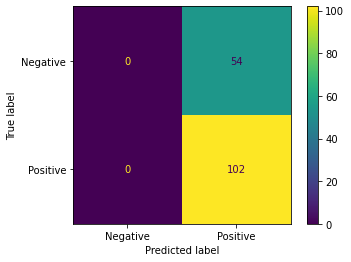

In [38]:
print(classification_report(y_test, y_pred_svc_rbf))
cm = confusion_matrix(y_test, y_pred_svc_rbf)
ConfusionMatrixDisplay(cm,display_labels=['Negative','Positive']).plot();

In [39]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10]}
svc = SVC(kernel='rbf')
svc_cv_rbf = GridSearchCV(svc,svc_params,cv=10)
svc_cv_rbf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10]})

In [40]:
svc_cv_rbf.best_params_

{'C': 10, 'gamma': 0.1}

In [41]:
svc = SVC(kernel='rbf',C=10,gamma=0.1)
svc_model_rbf = svc.fit(X_train,y_train)
y_pred_svc_rbf = svc_model_rbf.predict(X_test)
print('f1_score: ',f1_score(y_test,svc_model_rbf.predict(X_test),average=None))
print('Acc score:',accuracy_score(y_test,y_pred_svc_rbf))

f1_score:  [0.96296296 0.98039216]
Acc score: 0.9743589743589743


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.98      0.98      0.98       102

    accuracy                           0.97       156
   macro avg       0.97      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156



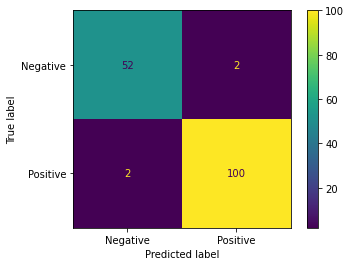

In [42]:
print(classification_report(y_test, y_pred_svc_rbf))
cm = confusion_matrix(y_test, y_pred_svc_rbf)
ConfusionMatrixDisplay(cm,display_labels=['Negative','Positive']).plot();

#### Neural net

In [43]:
#Standartizating
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
X_train_scaled

array([[-1.54877215, -0.75429803,  0.97289468, ..., -0.80439967,
        -0.75429803, -0.41736501],
       [-0.97932461,  1.32573593, -1.02786048, ..., -0.80439967,
        -0.75429803, -0.41736501],
       [ 0.729018  , -0.75429803,  0.97289468, ...,  1.24316312,
        -0.75429803, -0.41736501],
       ...,
       [-0.65392602,  1.32573593, -1.02786048, ...,  1.24316312,
        -0.75429803, -0.41736501],
       [ 0.729018  , -0.75429803, -1.02786048, ..., -0.80439967,
        -0.75429803, -0.41736501],
       [ 3.41355641,  1.32573593,  0.97289468, ...,  1.24316312,
         1.32573593, -0.41736501]])

In [45]:
mlpc = MLPClassifier()
mlpc_model = mlpc.fit(X_train_scaled,y_train)
y_pred_mlpc = mlpc_model.predict(X_test_scaled)
print('f1_score: ',f1_score(y_test,mlpc_model.predict(X_test_scaled),average=None))
print('Acc score:',accuracy_score(y_test,y_pred_mlpc))

f1_score:  [0.96363636 0.98019802]
Acc score: 0.9743589743589743


              precision    recall  f1-score   support

           0       0.95      0.98      0.96        54
           1       0.99      0.97      0.98       102

    accuracy                           0.97       156
   macro avg       0.97      0.98      0.97       156
weighted avg       0.97      0.97      0.97       156



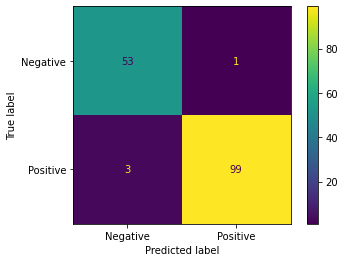

In [46]:
print(classification_report(y_test, y_pred_mlpc))
cm = confusion_matrix(y_test, y_pred_mlpc)
ConfusionMatrixDisplay(cm,display_labels=['Negative','Positive']).plot();

In [47]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100)],
              "activation": ["relu","logistic"]}

In [48]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params,cv = 10)
mlpc_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100)]})

In [49]:
mlpc_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 100)}

In [50]:
mlpc = MLPClassifier(activation='relu', alpha=0.01,hidden_layer_sizes=(100, 100))
mlpc_model = mlpc.fit(X_train_scaled,y_train)
y_pred_mlpc = mlpc_model.predict(X_test_scaled)
print('f1_score: ',f1_score(y_test,mlpc_model.predict(X_test_scaled),average=None))
print('Acc score:',accuracy_score(y_test,y_pred_mlpc))

f1_score:  [0.98148148 0.99019608]
Acc score: 0.9871794871794872


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.99      0.99      0.99       102

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



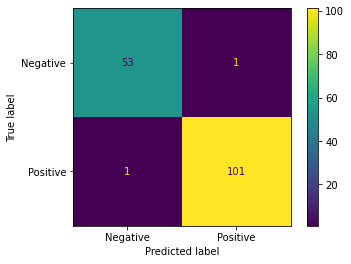

In [51]:
print(classification_report(y_test, y_pred_mlpc))
cm = confusion_matrix(y_test, y_pred_mlpc)
ConfusionMatrixDisplay(cm,display_labels=['Negative','Positive']).plot();

#### CART

In [52]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train,y_train)
y_pred_cart = cart_model.predict(X_test)
print('f1_score: ',f1_score(y_test,cart_model.predict(X_test),average=None))
print('Acc score:',accuracy_score(y_test,y_pred_cart))

f1_score:  [0.93693694 0.96517413]
Acc score: 0.9551282051282052


              precision    recall  f1-score   support

           0       0.91      0.96      0.94        54
           1       0.98      0.95      0.97       102

    accuracy                           0.96       156
   macro avg       0.95      0.96      0.95       156
weighted avg       0.96      0.96      0.96       156



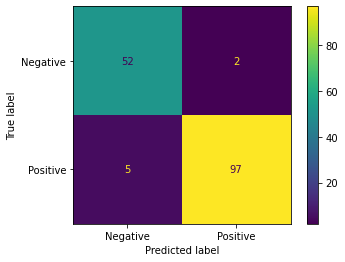

In [53]:
print(classification_report(y_test, y_pred_cart))
cm = confusion_matrix(y_test, y_pred_cart)
ConfusionMatrixDisplay(cm,display_labels=['Negative','Positive']).plot();

In [54]:
cart_params = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,20)) }

In [55]:
cart = DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_params, cv = 10)
cart_cv_model = cart_cv.fit(X_train, y_train)

In [56]:
cart_cv.best_params_

{'max_depth': 8, 'min_samples_split': 2}

In [57]:
cart = DecisionTreeClassifier(max_depth=7,min_samples_split=2)
cart_model = cart.fit(X_train,y_train)
y_pred_cart = cart_model.predict(X_test)
print('f1_score: ',f1_score(y_test,cart_model.predict(X_test),average=None))
print('Acc score:',accuracy_score(y_test,y_pred_cart))

f1_score:  [0.90909091 0.95049505]
Acc score: 0.9358974358974359


              precision    recall  f1-score   support

           0       0.89      0.93      0.91        54
           1       0.96      0.94      0.95       102

    accuracy                           0.94       156
   macro avg       0.93      0.93      0.93       156
weighted avg       0.94      0.94      0.94       156



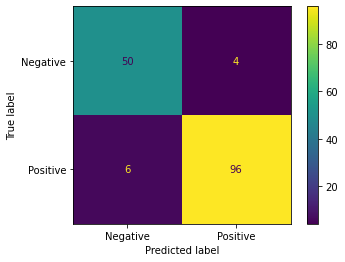

In [58]:
print(classification_report(y_test, y_pred_cart))
cm = confusion_matrix(y_test, y_pred_cart)
ConfusionMatrixDisplay(cm,display_labels=['Negative','Positive']).plot();

#### Random Forest

In [59]:
rf = RandomForestClassifier()
rf_model = rf.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
print('f1_score: ',f1_score(y_test,rf_model.predict(X_test),average=None))
print('Acc score:',accuracy_score(y_test,y_pred_rf))

f1_score:  [0.99082569 0.99507389]
Acc score: 0.9935897435897436


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.99      1.00       102

    accuracy                           0.99       156
   macro avg       0.99      1.00      0.99       156
weighted avg       0.99      0.99      0.99       156



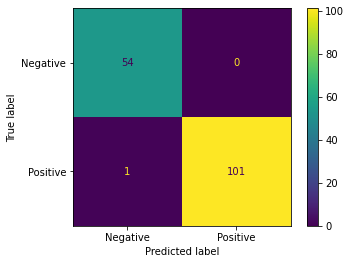

In [60]:
print(classification_report(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm,display_labels=['Negative','Positive']).plot();

In [61]:
print('accuracy_score:Logistic regression -',accuracy_score(y_test,y_pred_log)),
print('accuracy_score:Neural networks -',accuracy_score(y_test,y_pred_mlpc)),
print('accuracy_score:Naive Bayes -',accuracy_score(y_test,y_pred_nb)),
print('accuracy_score:K-nearest neighbors -',accuracy_score(y_test,y_pred_knn)),
print('accuracy_score:Support vector machines(rbf kernel) -',accuracy_score(y_test,y_pred_svc_rbf)),
print('accuracy_score:Support vector machines(linear kernel) -',accuracy_score(y_test,y_pred_svc_l)),
print('accuracy_score:CART -',accuracy_score(y_test,y_pred_cart)),
print('accuracy_score:Random forest -',accuracy_score(y_test,y_pred_rf))

accuracy_score:Logistic regression - 0.9423076923076923
accuracy_score:Neural networks - 0.9871794871794872
accuracy_score:Naive Bayes - 0.9102564102564102
accuracy_score:K-nearest neighbors - 0.9230769230769231
accuracy_score:Support vector machines(rbf kernel) - 0.9743589743589743
accuracy_score:Support vector machines(linear kernel) - 0.9551282051282052
accuracy_score:CART - 0.9358974358974359
accuracy_score:Random forest - 0.9935897435897436


In [62]:
Acc = pd.DataFrame()
Acc['Algoritms'] = pd.Series(['Logistic regression',
                                   'Neural networks',
                                   'Naive Bayes',
                                   'K-nearest neighbors',
                                   'Support vector machines(rbf kernel)',
                                   'Support vector machines(linear kernel)',
                                   'CART',
                                   'Random forest'])
Acc['Accuracy'] = pd.DataFrame([accuracy_score(y_test,y_pred_log),
                     accuracy_score(y_test,y_pred_mlpc),
                     accuracy_score(y_test,y_pred_nb),
                     accuracy_score(y_test,y_pred_knn),
                     accuracy_score(y_test,y_pred_svc_rbf),
                     accuracy_score(y_test,y_pred_svc_l),
                     accuracy_score(y_test,y_pred_cart),
                     accuracy_score(y_test,y_pred_rf)])

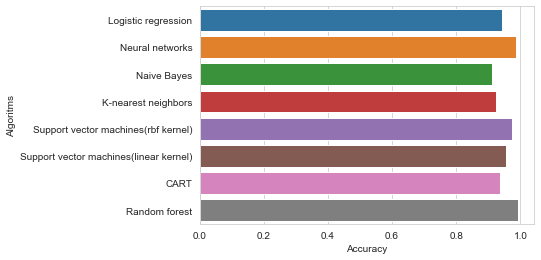

In [63]:
sns.set_style(style="whitegrid")
sns.barplot(y = 'Algoritms',x = 'Accuracy',data=Acc);

#### Saving best model

In [64]:
with open('diabets_class.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

#### Loading model

In [65]:
with open('diabets_class.pkl','rb') as f:
    loaded_model = pickle.load(f)

In [66]:
loaded_model.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0], dtype=uint8)